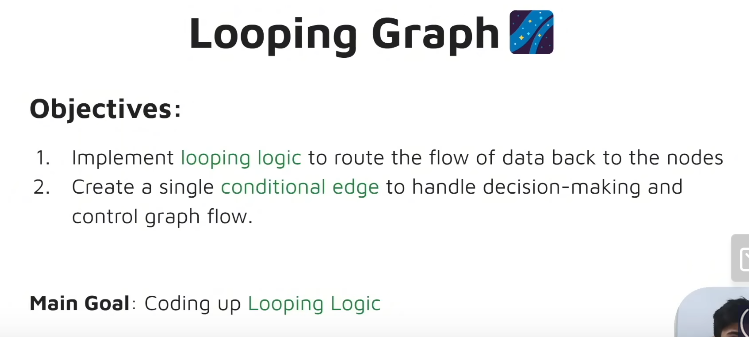

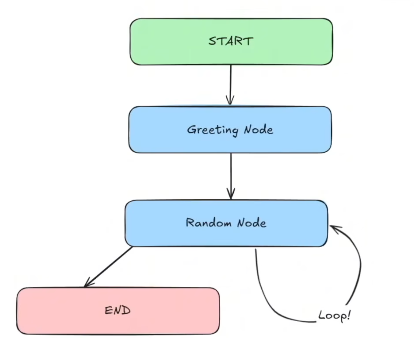

FYI: This is totally useless, you could just have a for loop inside a node for this. This is just for learning

In [1]:
from typing import Dict, List, TypedDict
from langgraph.graph import StateGraph, END
import random

In [2]:
class AgentState(TypedDict):
    name: str
    number: List[int]
    counter: int

In [ ]:
def greeting_node(state: AgentState) -> AgentState:
    """ Greeting node which says hi to the person """
    state["name"] = f"Hi there, {state["name"]}"
    state["counter"] = 0

    return state


def random_node(state: AgentState) -> AgentState:
    """ Generate a random number from 0 to 10 """
    state["number"].append(random.randint(0, 10))
    state["counter"] += 1

    return state

In [4]:
def should_continue(state: AgentState) -> AgentState:
    """ Function to decide what to do next """
    if state["counter"] < 5:
        print("ENTERING LOOP", state["counter"])
        return "loop"
    else:
        return "exit"

In [5]:
graph = StateGraph(AgentState)

graph.add_node("greeting", greeting_node)
graph.add_node("random", random_node)
graph.add_edge("greeting", "random")


graph.add_conditional_edges(
    "random",
    should_continue,
    {
        "loop": "random",
        "exit": END
    }
)

graph.set_entry_point("greeting")

app = graph.compile()

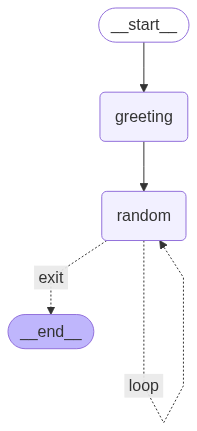

In [6]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [8]:
app.invoke({"name": "Puk", "number": [], "counter": -7})

ENTERING LOOP 1
ENTERING LOOP 2
ENTERING LOOP 3
ENTERING LOOP 4


{'name': 'Hi there, Puk', 'number': [3, 4, 10, 1, 9], 'counter': 5}